In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
titanic = pd.read_csv('train.csv')
titanic = titanic.rename(columns = lambda x:x.lower().strip())
titanic.set_index('passengerid',inplace=True)
titanic.head()

,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
passengerid,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   survived  891 non-null    int64  
 1   pclass    891 non-null    int64  
 2   name      891 non-null    object 
 3   sex       891 non-null    object 
 4   age       714 non-null    float64
 5   sibsp     891 non-null    int64  
 6   parch     891 non-null    int64  
 7   ticket    891 non-null    object 
 8   fare      891 non-null    float64
 9   cabin     204 non-null    object 
 10  embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [4]:
age_m = titanic.age.mean()
age_m

29.69911764705882

In [5]:
titanic.age.fillna(age_m,inplace=True)

In [6]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   survived  891 non-null    int64  
 1   pclass    891 non-null    int64  
 2   name      891 non-null    object 
 3   sex       891 non-null    object 
 4   age       891 non-null    float64
 5   sibsp     891 non-null    int64  
 6   parch     891 non-null    int64  
 7   ticket    891 non-null    object 
 8   fare      891 non-null    float64
 9   cabin     204 non-null    object 
 10  embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [7]:
import sklearn.tree as tr
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import cross_val_score

In [8]:
drops = ['ticket','name','fare','cabin','parch']
x = titanic.drop(drops,axis=1)
x.dropna(inplace=True)
y = x.survived
x = x.drop('survived',axis=1)
x['sex'][x.sex == 'male'] = 1
x['sex'][x.sex == 'female'] = 0
x['embarked'][x.embarked =='C'] = 1
x['embarked'][x.embarked =='Q'] = 2
x['embarked'][x.embarked =='S'] = 3


D:\anacoda\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
D:\anacoda\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
D:\anacoda\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
D:\anacoda\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slic

In [9]:
x.head()

,pclass,sex,age,sibsp,embarked
passengerid,,,,,
1,3,1,22.0,1,3
2,1,0,38.0,1,1
3,3,0,26.0,0,3
4,1,0,35.0,1,3
5,3,1,35.0,0,3


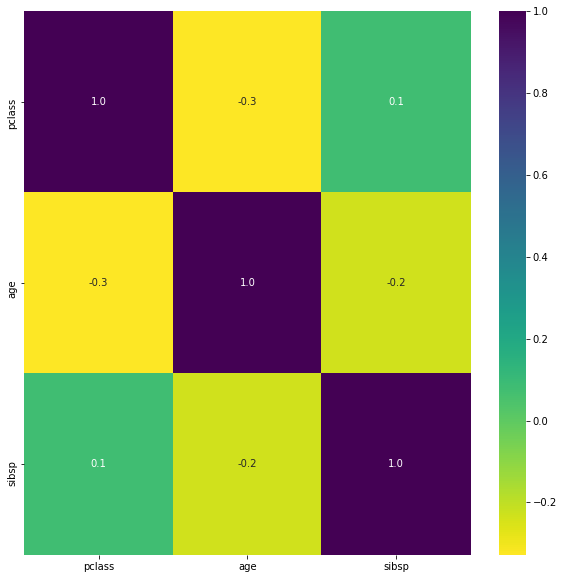

In [10]:
plt.figure(figsize=(10,10));
sns.heatmap(x.corr(),annot=True,fmt = '.1f',cmap='viridis_r');

In [11]:
# X_train, X_test, y_train, y_test = train_test_split(x,y)

In [12]:
clf = MLPClassifier(max_iter=15000,n_iter_no_change=100)
clf


MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(100,), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=15000,
              momentum=0.9, n_iter_no_change=100, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

In [13]:
x.head()

,pclass,sex,age,sibsp,embarked
passengerid,,,,,
1,3,1,22.0,1,3
2,1,0,38.0,1,1
3,3,0,26.0,0,3
4,1,0,35.0,1,3
5,3,1,35.0,0,3


In [14]:
y.head()

passengerid
1    0
2    1
3    1
4    1
5    0
Name: survived, dtype: int64

In [15]:
int(1/5*x.shape[0])

177

In [16]:
for i in np.arange(0,x.shape[0],round(1/5*x.shape[0])):
    x_test= x.iloc[i:i+round(1/5*x.shape[0]-1)]
    y_test= y.iloc[i:i+round(1/5*x.shape[0]-1)]
    x_train= x.drop([i+1,i+round(1/5*x.shape[0]-1)])
    y_train= y.drop([i+1,i+round(1/5*x.shape[0]-1)])
    model = clf.fit(x_train,y_train)
    print(i,i+round(1/5*x.shape[0]-1),model.score(x_test,y_test))

0 177 0.8531073446327684
178 355 0.8192090395480226
356 533 0.8418079096045198
534 711 0.7909604519774012
712 889 0.8813559322033898


In [17]:
x_test= x.iloc[712:889]
y_test= y.iloc[712:889]
x_train= x.drop([712,889])
y_train= y.drop([712,889])
model = clf.fit(x_train,y_train)

In [18]:
# model = clf.fit(X_train,y_train)

In [19]:
model.score(x_test,y_test)

0.8813559322033898

In [20]:
# lets try cross validation
scores = cross_val_score(clf, x, y, cv=5)
scores

array([0.82022472, 0.81460674, 0.79775281, 0.78089888, 0.84745763])

In [21]:
x_pred = pd.read_csv('test.csv')
x_pred = x_pred.rename(columns = lambda x:x.lower().strip())
x_pred.set_index('passengerid',inplace=True)
x_pred = x_pred.drop(drops,axis=1)

x_pred['sex'][x_pred.sex == 'male'] = 1
x_pred['sex'][x_pred.sex == 'female'] = 0
x_pred['embarked'][x_pred.embarked =='C'] = 1
x_pred['embarked'][x_pred.embarked =='Q'] = 2
x_pred['embarked'][x_pred.embarked =='S'] = 3
x_pred.head()

D:\anacoda\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
D:\anacoda\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
D:\anacoda\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
D:\anacoda\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slic

,pclass,sex,age,sibsp,embarked
passengerid,,,,,
892,3,1,34.5,0,2
893,3,0,47.0,1,3
894,2,1,62.0,0,2
895,3,1,27.0,0,3
896,3,0,22.0,1,3


In [22]:
x_pred.age.fillna(age_m,inplace=True)

In [23]:
result = model.predict(x_pred)

In [24]:
pred = pd.DataFrame({'PassengerId':x_pred.index,'Survived':result})

In [25]:
pred.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0


In [26]:
pred.set_index('PassengerId',inplace=True)
pred.head()

,Survived
PassengerId,
892,0
893,0
894,0
895,0
896,0


In [27]:
pred.to_csv('submission.csv')

In [40]:
import pickle

In [41]:
pickle.dump(model, open("nlp_model.sav", 'wb'))

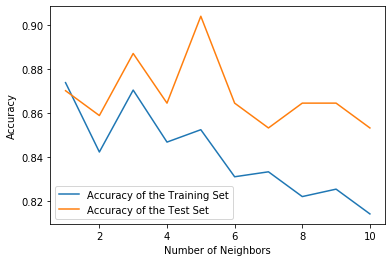

In [31]:
training_accuracy = []
test_accuracy = []

neighbors_settings = range(1,11)


for n_neighbors in neighbors_settings:
    
    clf = KNeighborsClassifier(n_neighbors=n_neighbors)
    clf.fit(x_train, y_train)
    training_accuracy.append(clf.score(x_train, y_train))
    test_accuracy.append(clf.score(x_test, y_test))
    
# Data Visualization - Evaluating the accuracy of both the training and the testing sets against 
# n_neighbors
    
plt.plot(neighbors_settings, training_accuracy, label='Accuracy of the Training Set')
plt.plot(neighbors_settings, test_accuracy, label='Accuracy of the Test Set')
plt.ylabel('Accuracy')
plt.xlabel('Number of Neighbors')
plt.legend()

In [39]:
clf = KNeighborsClassifier(n_neighbors=5)
model2 = clf.fit(x_train,y_train)
model2.score(x_test,y_test)

0.903954802259887

In [38]:
result = model2.predict(x_pred)
pred = pd.DataFrame({'PassengerId':x_pred.index,'Survived':result})
pred.set_index('PassengerId',inplace=True)
pred.to_csv('submission.csv')

In [45]:
pickle.dump(model2, open("k_Neighbors_model.sav", 'wb'))

In [46]:
loaded_model = pickle.load(open('k_Neighbors_model.sav', 'rb'))

In [48]:
loaded_model.score(x_test, y_test)

0.903954802259887